# Figures S3-4. Glass system breakdown of RF prediction accuracy

In [6]:
from glasspy.predict.models import GlassNet
from glasspy.data import SciGlass, sciglass_dbinfo

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.ensemble import RandomForestRegressor

import matplotlib.pyplot as plt
from scipy.stats import pearsonr, kendalltau, zscore
from scipy.constants import pi
import seaborn as sns
import pandas as pd
import numpy as np

from utils import get_gs, get_eta_tl, get_gfa

# Data

## Load GlassNet training and test data

In [10]:
glassnet_no_stnn = GlassNet(st_models=[])
glassnet_stnn = GlassNet()
glassnet_train_df = glassnet_stnn.get_training_dataset()
glassnet_test_df = glassnet_stnn.get_test_dataset()

In [11]:
X_glassnet_test = glassnet_test_df.elements
X_glassnet_train = glassnet_train_df.elements
X_glassnet_total = pd.concat( (X_glassnet_train, X_glassnet_test) )

In [12]:
X_glassnet_feats_test, feats = glassnet_stnn.featurizer(X_glassnet_test, return_cols = True)
X_glassnet_feats_train, feats = glassnet_stnn.featurizer(X_glassnet_train, return_cols = True)
X_glassnet_feats_total, feats = glassnet_stnn.featurizer(X_glassnet_total, return_cols = True)

In [13]:
X_glassnet_feats_test = pd.DataFrame(X_glassnet_feats_test, columns = feats)
X_glassnet_feats_train = pd.DataFrame(X_glassnet_feats_train, columns = feats)
X_glassnet_feats_total = pd.DataFrame(X_glassnet_feats_total, columns = feats)

In [14]:
X_glassnet_feats_test.index = X_glassnet_test.index
X_glassnet_feats_train.index = X_glassnet_train.index
X_glassnet_feats_total.index = X_glassnet_total.index

In [15]:
y_glassnet_test = glassnet_test_df.property.rename(columns={'CrystallizationOnset':'Tx', 'CrystallizationPeak':'Tc', 'TMaxGrowthVelocity': 'T_Umax', 
                           'MaxGrowthVelocity': 'log_Umax', 'Tliquidus':'Tliq'})
y_glassnet_train = glassnet_train_df.property.rename(columns={'CrystallizationOnset':'Tx', 'CrystallizationPeak':'Tc', 'TMaxGrowthVelocity': 'T_Umax', 
                           'MaxGrowthVelocity': 'log_Umax', 'Tliquidus':'Tliq'})
y_glassnet_total = pd.concat( (y_glassnet_train, y_glassnet_test) )

# Compute GS

In [16]:
gs_glassnet_train = get_gs(y_glassnet_train )
gs_glassnet_test = get_gs( y_glassnet_test )
gs_glassnet_total = pd.concat( (gs_glassnet_train, gs_glassnet_test) )

In [17]:
gfa_glassnet_train = get_gfa(y_glassnet_train)
gfa_glassnet_test = get_gfa(y_glassnet_test)
gfa_glassnet_total = pd.concat( (gfa_glassnet_train, gfa_glassnet_test) )

/Users/sarahisabelallec/opt/anaconda3/envs/glassnet_0_4_6/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sarahisabelallec/opt/anaconda3/envs/glassnet_0_4_6/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/sarahisabelallec/opt/anaconda3/envs/glassnet_0_4_6/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Evaluate RF accuracy for GS prediction for different glass families

In [18]:
formers = ['Si', 'P', 'B', 'Al']
modifiers = ['Na', 'Li', 'K', 'Cs', 'Ca', 'Mg'] # have not used yet

In [19]:
X_by_former = []
for former in formers:
    X_by_former.append( X_glassnet_total[ X_glassnet_total[former] >  X_glassnet_total[ [f for f in formers if f != former] ].sum(axis=1) ] )   

In [20]:
myrcparams = {
    'axes.labelsize': 16,
    'axes.titlesize': 16,
    'axes.labelcolor': 'black',
    'xtick.labelcolor': 'black',
    'ytick.labelcolor': 'black',
    #'axes.xmargin': 0,
    #'axes.ymargin': 0,
    'legend.fontsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'figure.autolayout': True,
    'figure.figsize': (4.5,4)
}
plt.rcParams.update(myrcparams)

## Figure S3

In [21]:
temp_cols = ['Tg', 'Tc', 'Tx', 'Tliq']
temp_titles = ['$T_g$', '$T_c$', '$T_x$', '$T_l$']
colors = ['coral', 'dodgerblue', 'mediumaquamarine', 'orchid']
ecolors = ['darkred', 'navy', 'teal', 'darkmagenta']
alphas = [0.8, 0.7, 0.6, 0.6]

In [22]:
source = SciGlass()
df = source.data
source.remove_duplicate_composition(aggregator='std')
df_std = source.data.rename(columns={'CrystallizationOnset':'Tx', 'CrystallizationPeak':'Tc', 'TMaxGrowthVelocity': 'T_Umax', 
                           'MaxGrowthVelocity': 'log_Umax', 'Tliquidus':'Tliq'})
quantiles = df_std.property[temp_cols].quantile(q=0.75)

Tg Si 2152 0.9462467517106342 19.44589962813943 10.292590959029836
Tg P 1324 0.918115411527423 22.46815558891648 10.292590959029836
Tg B 1618 0.9345881552372528 17.07900061839599 10.292590959029836
Tg Al 333 0.9783500084075507 15.536105105196828 10.292590959029836
Tc Si 473 0.8829323591898631 46.026997807121624 33.23401871576773
Tc P 265 0.9172153053930101 34.632711320841125 33.23401871576773
Tc B 225 0.905350398804351 33.18235555555562 33.23401871576773
Tc Al 137 0.964966526133468 25.18054015667781 33.23401871576773
Tx Si 128 0.9103022211208439 39.45269531250011 20.506096654409877
Tx P 162 0.9241565755993534 27.308765432098863 20.506096654409877
Tx B 101 0.9407297975972705 26.834653453260632 20.506096654409877
Tx Al 147 0.9541135593812682 22.788666668327398 20.506096654409877
Tliq Si 2160 0.9325592540747474 33.06860494246314 7.723145199062156
Tliq P 331 0.945710225661226 38.6089078597796 7.723145199062156
Tliq B 477 0.9530014561331341 24.959588051082438 7.723145199062156
Tliq Al 152 0

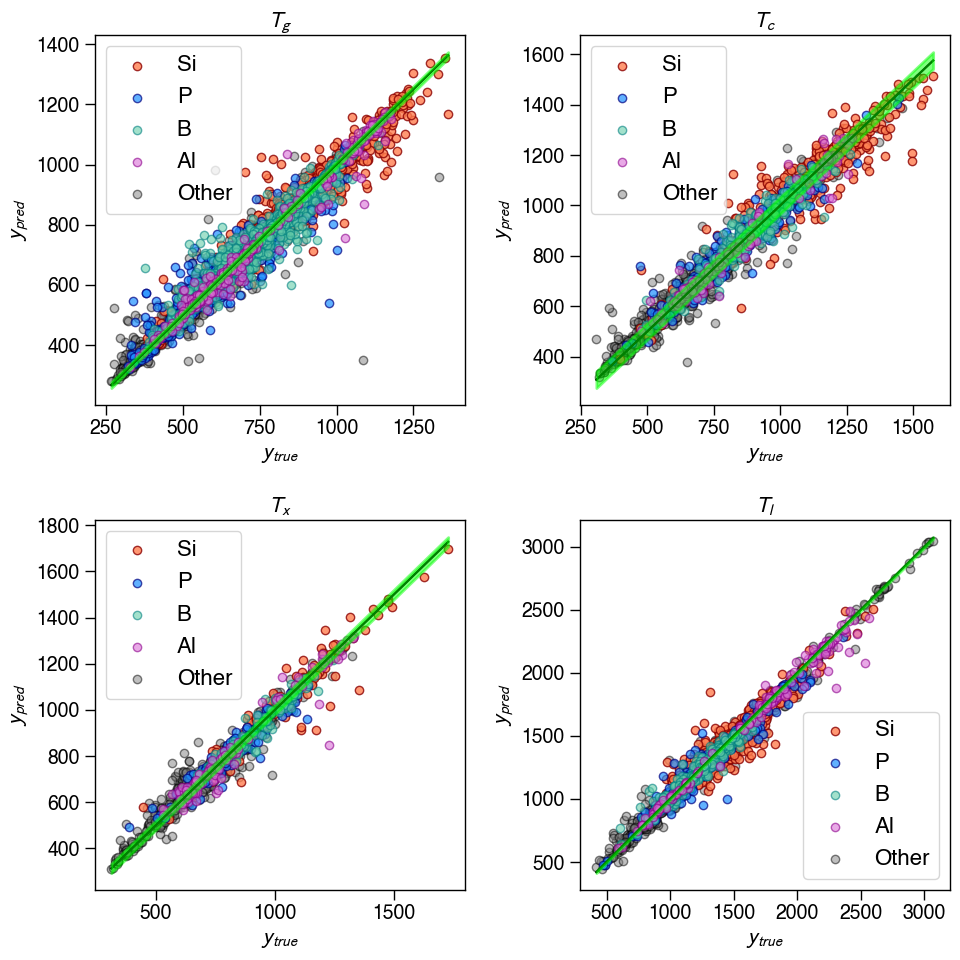

In [23]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
r2_arr = np.zeros( ( len(formers) + 1, len(temp_cols) ) )
resids_t = {col:[] for col in temp_cols}

y_pred_rf = pd.read_csv(f'rf_preds_iteration0.csv', index_col=0)
for i, col in enumerate(temp_cols[:4]):
    
    if i < 2:
        ax = axes[0,i]
    else:
        ax = axes[1,i-2]
    y_true_all = []
    former_inds = []
    for j,former in enumerate( formers ):
        X = X_by_former[j]
        inds_test = y_glassnet_test[col].dropna().index.intersection( X.index )
        y_test = y_glassnet_test.loc[inds_test, col]
        y_rf_pred = y_pred_rf.loc[inds_test, col]
        y_rf_pred.index = inds_test
        
        ax.scatter(y_test, y_rf_pred, color = colors[j], alpha = alphas[j], edgecolor = ecolors[j], label = former, zorder=2)
        print( col, former, len(inds_test), r2_score( y_test, y_rf_pred ), mean_absolute_error( y_test, y_rf_pred ), quantiles[col] )
        r2_arr[j,i] = r2_score( y_test, y_rf_pred )
        resids_t[col].append( y_rf_pred - y_test )
        for y in y_test:
            if y not in y_true_all:
                y_true_all.append(y)
        for ind in list( inds_test ):
            former_inds.append(ind)
    y_true_line = np.linspace(min(y_glassnet_test[col].dropna()), max(y_glassnet_test[col].dropna()), 100)
    ax.plot(y_true_line, y_true_line, color='k')
    ax.plot(y_true_line, y_true_line, color='k')
    ax.fill_between(y_true_line, (y_true_line-quantiles[col]), (y_true_line+quantiles[col]), color='lime', alpha=.5, linewidth=2.0, zorder=3 )
    
    other_inds = [ i for i in list(y_glassnet_test[col].dropna().index) if i not in former_inds ]
    others_y_pred = y_pred_rf.loc[ other_inds, col ]
    others_y_pred.index = other_inds
    ax.scatter(y_glassnet_test.loc[other_inds, col].dropna(),  others_y_pred, color = 'gray', edgecolor='black', alpha = 0.5, zorder=1, label='Other')
    r2_arr[-1,i] = r2_score( y_glassnet_test.loc[other_inds, col].dropna(), others_y_pred )
    
    resids_t[col].append( others_y_pred - y_glassnet_test.loc[other_inds, col] )
    #ax.fill_between(y_true_line, (y_true_line-quantiles[col]), (y_true_line+quantiles[col]), color='yellow', alpha=.5)
    
    ax.legend()
    ax.set_title(temp_titles[i])
    ax.set_xlabel(r'$y_{true}$')
    ax.set_ylabel(r'$y_{pred}$')
fig.savefig('figureS3.png', dpi=600)

In [24]:
r2_df = pd.DataFrame( r2_arr, columns = temp_cols )
r2_df.index = formers + ['other']

In [25]:
r2_df

,Tg,Tc,Tx,Tliq
Si,0.946247,0.882932,0.910302,0.932559
P,0.918115,0.917215,0.924157,0.945710
B,0.934588,0.905350,0.940730,0.953001
Al,0.978350,0.964967,0.954114,0.981934
other,0.953146,0.948805,0.950019,0.989094


# Figure S4

In [29]:
gs_rf_pred = get_gs( y_pred_rf )

In [30]:
gs_rf_pred.index = X_glassnet_test.index

In [31]:
gs_cols = ['K_W_Tc', 'gamma_Tc', 'H_prime_Tc']
gs_titles = [r'$K_{W}(T_{c})$', r'$\gamma(T_{c})$', 
          r'$H^{\prime}(T_{c})$']

In [32]:
myrcparams = {
    'axes.labelsize': 18,
    'axes.titlesize': 18,
    'axes.labelcolor': 'black',
    'xtick.labelcolor': 'black',
    'ytick.labelcolor': 'black',
    #'axes.xmargin': 0,
    #'axes.ymargin': 0,
    'legend.fontsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'figure.autolayout': True,
    'figure.figsize': (4.5,4)
}
plt.rcParams.update(myrcparams)

K_W_Tc Si 19 0.6762889318572054 0.02494091167450155
K_W_Tc P 9 0.30111758734305494 0.029909155348786725
K_W_Tc B 31 0.24065122074488665 0.03298584104982009
K_W_Tc Al 7 0.7361046269207145 0.012267970671801572
57
gamma_Tc Si 19 0.6715822617830824 0.01672964241064337
gamma_Tc P 9 0.5006167495663407 0.0170015349889294
gamma_Tc B 31 0.32820702461519513 0.023931772800374163
gamma_Tc Al 7 0.8106722383664009 0.009148576032259301
57
H_prime_Tc Si 331 0.5304378137377306 0.058583743667329345
H_prime_Tc P 252 0.6001322136005824 0.05063482853074126
H_prime_Tc B 200 0.6351727140463261 0.0514161878825996
H_prime_Tc Al 120 0.33379581311621 0.038368811271781704
801


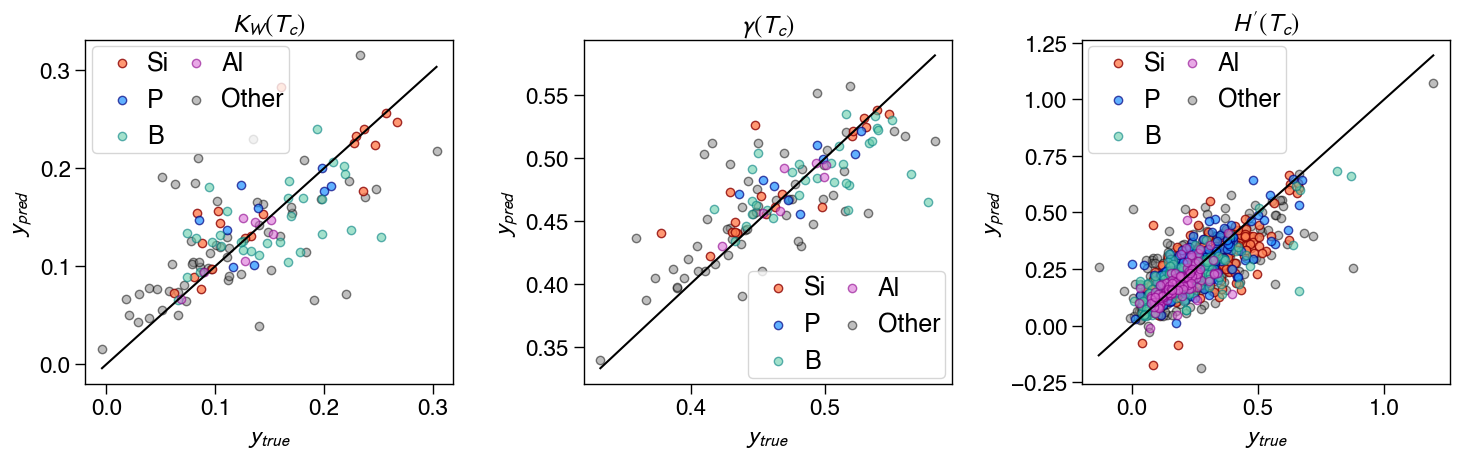

In [33]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
r2_arr = np.zeros( ( len(formers) + 1, len(gs_cols) ) )
mae_arr = np.zeros( ( len(formers) + 1, len(gs_cols) ) )
resids_gs = {col:[] for col in gs_cols}
for i, col in enumerate(gs_cols):
    
    ax = axes[i]
    y_true_all = []
    former_inds = []
    for j,former in enumerate( formers ):
        X = X_by_former[j]
        inds_test = gs_glassnet_test[col].dropna().index.intersection( X.index )
        y_test = gs_glassnet_test.loc[inds_test, col]
        y_rf_pred = gs_rf_pred.loc[inds_test, col]
        
        ax.scatter(y_test, y_rf_pred, color = colors[j], alpha = alphas[j], edgecolor = ecolors[j], label = former, zorder=2)
        print( col, former, len(inds_test), r2_score( y_test, y_rf_pred ), mean_absolute_error( y_test, y_rf_pred ) )
        r2_arr[j,i] = r2_score( y_test, y_rf_pred )
        mae_arr[j,i] = mean_absolute_error( y_test, y_rf_pred )
        resids_gs[col].append( y_rf_pred - y_test )
        for y in y_test:
            if y not in y_true_all:
                y_true_all.append(y)
        for ind in list( inds_test ):
            former_inds.append(ind)
    y_true_line = np.linspace(min(gs_glassnet_test[col].dropna()), max(gs_glassnet_test[col].dropna()), 100)
    ax.plot(y_true_line, y_true_line, color='k')

    
    other_inds = [ i for i in list(gs_glassnet_test[col].dropna().index) if i not in former_inds ]
    print(len(other_inds))
    others_y_pred = gs_rf_pred.loc[ other_inds, col ]
    ax.scatter(gs_glassnet_test.loc[other_inds, col].dropna(),  others_y_pred, color = 'gray', edgecolor='black', alpha = 0.5, zorder=1, label='Other')
    resids_gs[col].append( others_y_pred - gs_glassnet_test.loc[other_inds, col] )
    
    r2_arr[-1,i] = r2_score( gs_glassnet_test.loc[other_inds, col].dropna(), others_y_pred )
    mae_arr[-1,i] = mean_absolute_error( gs_glassnet_test.loc[other_inds, col].dropna(), others_y_pred )
    #ax.fill_between(y_true_line, (y_true_line-quantiles[col]), (y_true_line+quantiles[col]), color='yellow', alpha=.5)
    
    ax.legend(ncol=2, columnspacing=0.05, handletextpad = 0.025, borderpad = 0.2, borderaxespad = 0.25)
    ax.set_title(gs_titles[i])
    ax.set_xlabel(r'$y_{true}$')
    ax.set_ylabel(r'$y_{pred}$')
fig.savefig('figureS4_1.png', dpi=600)

In [34]:
r2_df = pd.DataFrame( r2_arr, columns = gs_cols )
r2_df.index = formers + ['other']

In [35]:
r2_df

,K_W_Tc,gamma_Tc,H_prime_Tc
Si,0.676289,0.671582,0.530438
P,0.301118,0.500617,0.600132
B,0.240651,0.328207,0.635173
Al,0.736105,0.810672,0.333796
other,0.259932,0.483511,0.562574


In [36]:
mae_df = pd.DataFrame( mae_arr, columns = gs_cols )
mae_df.index = formers + ['other']

In [37]:
mae_df

,K_W_Tc,gamma_Tc,H_prime_Tc
Si,0.024941,0.016730,0.058584
P,0.029909,0.017002,0.050635
B,0.032986,0.023932,0.051416
Al,0.012268,0.009149,0.038369
other,0.040310,0.027253,0.052930


Si Tc K_W_Tc 19 0.6257309941520467
Si Tc gamma_Tc 19 0.7076023391812866
Si Tc H_prime_Tc 331 0.5962281424517073
B Tc K_W_Tc 31 0.578494623655914
B Tc gamma_Tc 31 0.5913978494623657
B Tc H_prime_Tc 200 0.589748743718593
Al Tc H_prime_Tc 120 0.5742296918767507
other Tc K_W_Tc 57 0.5789473684210528
other Tc gamma_Tc 57 0.5000000000000001
other Tc H_prime_Tc 801 0.5319282081591135


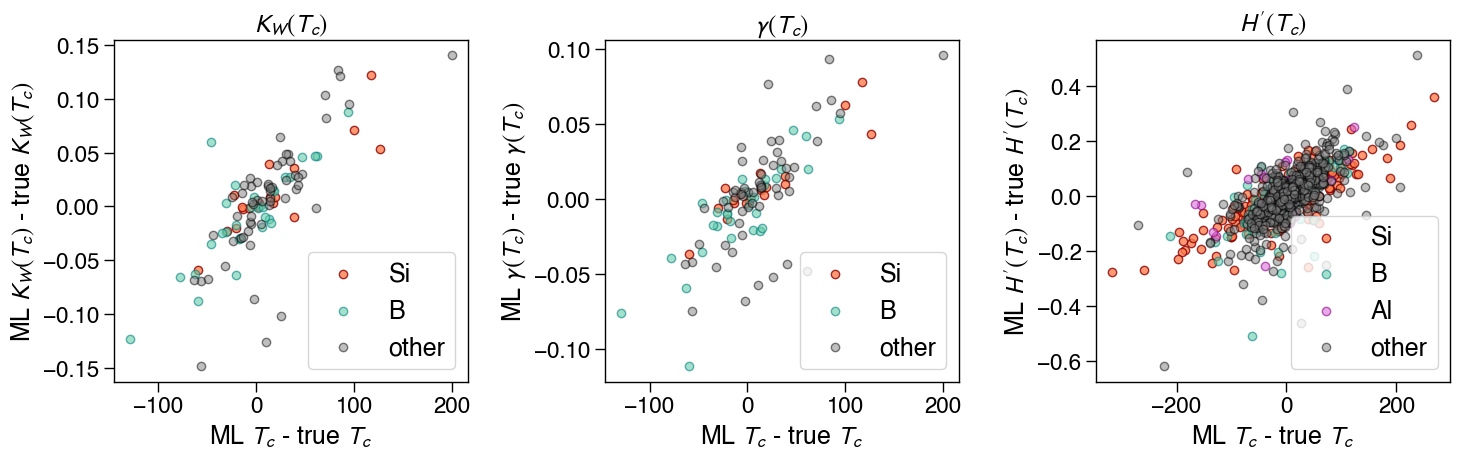

In [38]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
colors = colors + ['gray']
ecolors = ecolors + ['black']
alphas = alphas + [0.5]
for i,col in enumerate(temp_cols[:4]):

    for j,former in enumerate(formers+["other"]):
        this_resids_t = resids_t[col][j]
        
        for k, gs_col in enumerate(gs_cols):
            ax = axes[k]
            this_resids_gs = resids_gs[gs_col][j]
            inds = this_resids_t.index.intersection( this_resids_gs.index )
            tau_gs = kendalltau( this_resids_t.loc[inds], this_resids_gs.loc[inds] )

            if len(inds) > 10:
                if tau_gs[0] > 0.5 and tau_gs[1] < 0.05:
                    print(former, col, gs_col, len(inds), tau_gs[0])
                    
                    ax.scatter(this_resids_t.loc[inds], this_resids_gs.loc[inds], color = colors[j], alpha = alphas[j], 
                       edgecolor = ecolors[j], label = former)
                    #ax.legend(ncol=2, columnspacing=0.05, handletextpad = 0.025, borderpad = 0.2, borderaxespad = 0.25)
                    ax.legend()
                    ax.set_title(gs_titles[k])
                    ax.set_xlabel(f'ML {temp_titles[i]} - true {temp_titles[i]}')
                    ax.set_ylabel(f'ML {gs_titles[k]} - true {gs_titles[k]}' )
        fig.savefig('figureS4_2.png')

In [39]:
from sklearn.metrics import mean_squared_error

In [40]:
for i,col in enumerate(temp_cols[:4]):
    y_true = y_glassnet_test[col].dropna()
    y_pred = y_pred_rf.loc[ y_true.index, col ]

    print(col, mean_absolute_error( y_true, y_pred ), np.sqrt( mean_squared_error( y_true, y_pred ) ), quantiles[col] )

Tg 19.02624325244862 34.37372121539187 10.292590959029836
Tc 34.54560293642716 51.93184224196251 33.23401871576773
Tx 28.8711806118947 44.43836064304862 20.506096654409877
Tliq 32.337215700790544 53.68090254039517 7.723145199062156
